In [14]:
import os
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [15]:
datadir = 'data'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'), names= columns)
pd.set_option('display.max_colwidth', -1)
data.head(5)

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_710.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_710.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_710.jpg,0.0,0.0,0.0,0.000079
1,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_815.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_815.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_815.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_37_914.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_37_914.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_37_914.jpg,0.0,0.0,0.0,0.000080
3,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_38_015.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_38_015.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_38_015.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\Vedansh\Desktop\SDC\Data\IMG\center_2019_07_24_13_27_38_118.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\left_2019_07_24_13_27_38_118.jpg,C:\Users\Vedansh\Desktop\SDC\Data\IMG\right_2019_07_24_13_27_38_118.jpg,0.0,0.0,0.0,0.000078


In [16]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head(5)

,center,left,right,steering,throttle,reverse,speed
0,center_2019_07_24_13_27_37_710.jpg,left_2019_07_24_13_27_37_710.jpg,right_2019_07_24_13_27_37_710.jpg,0.0,0.0,0.0,0.000079
1,center_2019_07_24_13_27_37_815.jpg,left_2019_07_24_13_27_37_815.jpg,right_2019_07_24_13_27_37_815.jpg,0.0,0.0,0.0,0.000078
2,center_2019_07_24_13_27_37_914.jpg,left_2019_07_24_13_27_37_914.jpg,right_2019_07_24_13_27_37_914.jpg,0.0,0.0,0.0,0.000080
3,center_2019_07_24_13_27_38_015.jpg,left_2019_07_24_13_27_38_015.jpg,right_2019_07_24_13_27_38_015.jpg,0.0,0.0,0.0,0.000078
4,center_2019_07_24_13_27_38_118.jpg,left_2019_07_24_13_27_38_118.jpg,right_2019_07_24_13_27_38_118.jpg,0.0,0.0,0.0,0.000078


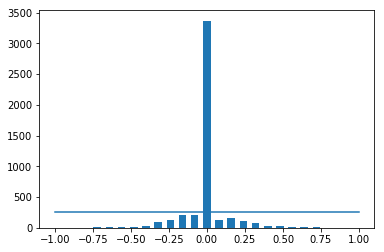

In [17]:
num_bins = 25
samples_per_bin = 250
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

removed : 3119
total : 4676
remaining : 1557


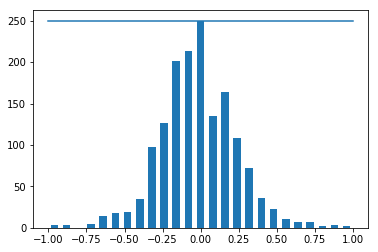

In [18]:
remove_list = []
for j in range(num_bins):
    list_a = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
           list_a.append(i)  
    list_a = shuffle(list_a)
    list_a = list_a[samples_per_bin:]
    remove_list.extend(list_a)
    
    
print('removed : ' + str(len(remove_list)))
print('total : ' + str(len(data)))
data.drop(data.index[remove_list], inplace=True)
print('remaining : ' + str(len(data)))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [19]:
print(data.iloc[1])

def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

center      center_2019_07_24_13_27_39_768.jpg
left        left_2019_07_24_13_27_39_768.jpg  
right       right_2019_07_24_13_27_39_768.jpg 
steering   -0.435657                          
throttle    1                                 
reverse     0                                 
speed       3.70763                           
Name: 20, dtype: object


In [30]:
X_train, X_test, y_train, y_test = train_test_split(image_paths, steerings, test_size=0.2, random_state=99)
print('Training samples : {}\n Test Samples : {}'.format(len(X_train), len(X_test)))

Training samples : 1245
 Test Samples : 312


Text(0.5, 1.0, 'Test Set')

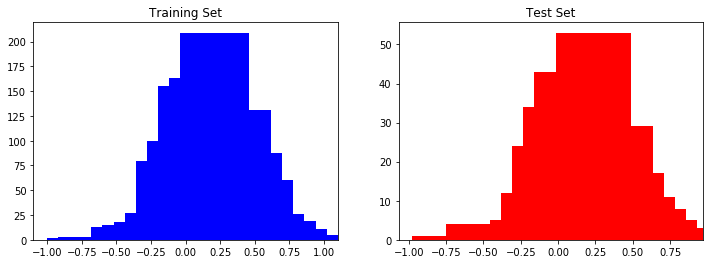

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].hist(y_train, bins=num_bins, width=0.5, color='blue')
axes[0].set_title('Training Set')
axes[1].hist(y_test, bins=num_bins, width=0.5, color='red')
axes[1].set_title('Test Set')